In [1]:
import pandas as pd

df = pd.read_csv("merged_preprocessing.csv")

C:\Users\hyese\AppData\Local\Temp\ipykernel_11052\4003959479.py:3: DtypeWarning: Columns (12,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_preprocessing.csv")


In [2]:
df.to_csv("./merged_preprocessing_utf.csv", encoding="utf-8")

In [4]:
df.drop(columns=["수업유형"], inplace=True)
df

KeyError: "['수업유형'] not found in axis"

In [5]:
bool_count = (df.dtypes == 'bool').sum()
numeric_count = df.select_dtypes(include=['number']).shape[1]
string_count = df.select_dtypes(include=['object', 'string']).shape[1]

print(f"Boolean fields: {bool_count}")
print(f"Numeric fields: {numeric_count}")
print(f"String fields: {string_count}")

Boolean fields: 54
Numeric fields: 10
String fields: 8


In [6]:
df.dropna(axis=0)
df

,ID,Class,Title,Year,Semester,course evaluation,attendance rate,learning load,course difficulty,teaching ability,...,수업구성요소_집단지도,수업구성요소_체험,수업구성요소_퀴즈,수업구성요소_토론,수업구성요소_특강,수업구성요소_포럼,수업구성요소_프로젝트,수업구성요소_협동학습,성적평가_P/F,성적평가_절대평가
0,SEDU330,04,학교폭력예방및학생의이해*Course not open for foreign excha...,2023,2R,3.8,0.75,3.2,2.6,2.8,...,True,False,True,True,False,False,False,True,False,False
1,SEDU330,02,학교폭력예방및학생의이해*Course not open for foreign excha...,2023,2R,4.3,1.00,3.1,2.8,4.2,...,False,False,False,True,False,False,False,True,False,False
2,SEDU330,01,학교폭력예방및학생의이해*Course not open for foreign excha...,2023,2R,4.3,0.75,3.1,2.9,4.3,...,False,False,True,True,False,False,False,True,False,False
3,SEDU313,03,교육행정및교육경영*Course not open for foreign exchange...,2023,2R,4.7,1.00,2.7,2.7,4.0,...,True,False,False,True,False,False,False,True,False,True
4,SEDU313,02,교육행정및교육경영*수업시작시간 8:40 *Course not open for for...,2023,2R,3.8,1.00,3.2,3.1,3.4,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30625,NRSG243,00,기초간호과학III,2017,1R,3.5,1.00,4.8,4.0,4.7,...,False,False,False,True,False,False,False,False,False,False
30626,NRSG241,00,기초간호과학II,2017,1R,3.4,1.00,3.7,3.7,5.0,...,False,False,False,True,False,False,False,False,False,False
30627,NRSG234,00,간호연구방법론,2017,1R,2.7,1.00,4.0,4.7,5.0,...,True,False,False,True,False,False,False,True,False,False
30628,NRSG233,00,간호정보학및실습,2017,1R,2.7,0.75,3.2,2.8,3.9,...,False,False,False,False,False,False,False,False,False,False


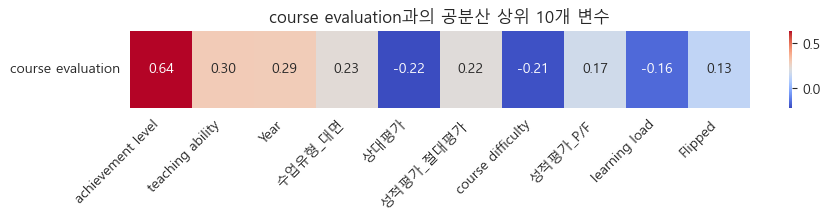

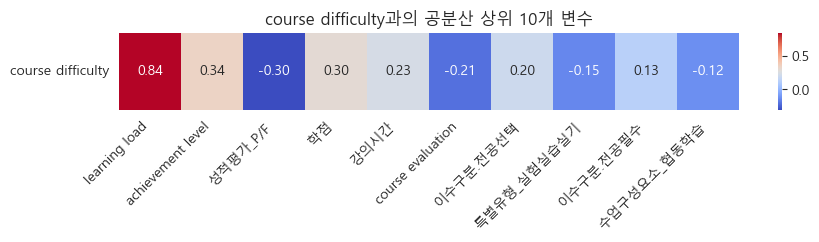

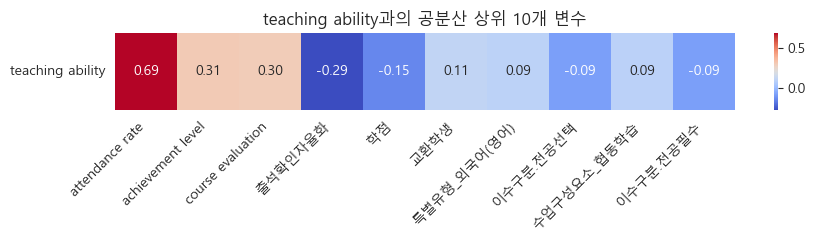

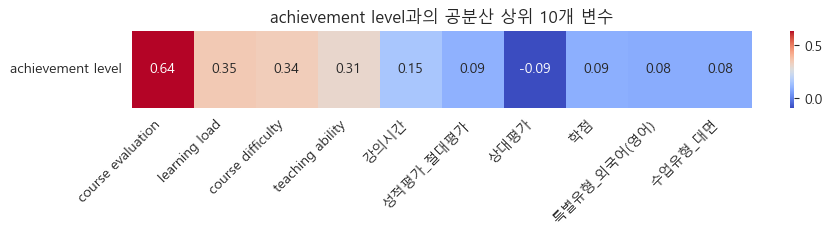

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 시각화 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 수치형 + 불리언 컬럼 선택 후 float 변환
df_selected = df.select_dtypes(include=['number', 'bool']).astype(float)

# 정규화
scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

# 기준 컬럼들 설정
target_cols = ["course evaluation", "course difficulty", "teaching ability", "achievement level"]
n = 10  # 상위 n개 변수

# 전체 공분산 행렬 계산
cov_matrix = normalized_df.cov()

# 기준 컬럼 각각에 대해 시각화
for target in target_cols:
    target_cov = cov_matrix.loc[target].drop(target)
    top_cov = target_cov.reindex(target_cov.abs().sort_values(ascending=False).head(n).index)

    # 히트맵 시각화
    plt.figure(figsize=(10, 1))
    sns.heatmap(top_cov.to_frame().T, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f'{target}과의 공분산 상위 {n}개 변수')
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.show()


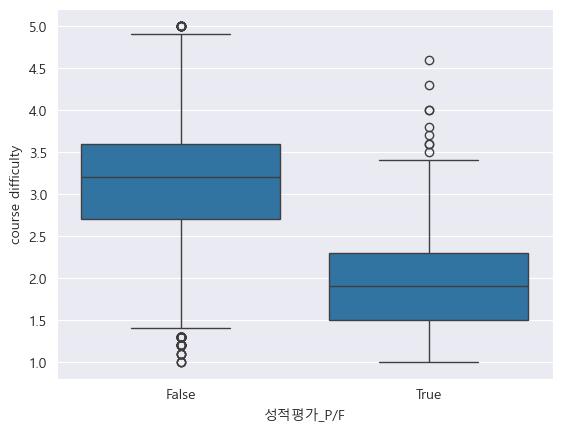

In [5]:
sns.boxplot(data=df, x="성적평가_P/F", y="course difficulty")
plt.show()

좋은 강의 (4.0 이상): 16926개
나쁜 강의 (4.0 미만): 13704개
좋은 강의 비율: 0.553
제외된 컬럼들: ['course evaluation', 'good_course', 'course evaluation', 'course difficulty', 'teaching ability', 'achievement level', 'Year', 'learning load', 'recommendation rate']
사용할 컬럼들: ['ID', 'Class', 'Title', 'Semester', 'attendance rate', '인원제한', 'NeMo', '영강', '튜토리얼', 'MOOC', '학점', '개설학과', '출석확인자율화', '유연학기', 'Flipped', '상대평가', '담당교수', '교과목명', '수강포기제한', '강의시간', '교환학생', '무감독시험', '이수구분.교직', '이수구분.교직(비사대)', '이수구분.군사학', '이수구분.전공선택', '이수구분.전공필수', '이수구분.평생교육사', '이수구분.학문의기초', '이수구분.학부공통', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일', '수업유형_대면', '수업유형_병행', '수업유형_원격', '수업유형_원격(녹화)', '수업유형_원격(실시간)', '수업유형_혼합', '특별유형_실험실습실기', '특별유형_외국어(영어)', '특별유형_캡스톤디자인', '특별유형_팀티칭', '특별유형_현장실습', '수업구성요소_Q&A', '수업구성요소_개별지도', '수업구성요소_발표', '수업구성요소_상시상담', '수업구성요소_실습', '수업구성요소_실험', '수업구성요소_이론강의', '수업구성요소_집단지도', '수업구성요소_체험', '수업구성요소_퀴즈', '수업구성요소_토론', '수업구성요소_특강', '수업구성요소_포럼', '수업구성요소_프로젝트', '수업구성요소_협동학습', '성적평가_P/F', '성적평가_절대평가']

=== 데이터 정보 ===
전체 샘플

C:\Users\hyese\AppData\Local\Temp\ipykernel_9292\959225762.py:93: RuntimeWarning: invalid value encountered in scalar divide
  effect_size = abs(good_courses.mean() - bad_courses.mean()) / np.sqrt(


상위 10개 피처 (효과 크기 기준):
            feature  effect_size        p_value  good_mean  bad_mean
37          수업유형_대면     0.379585  3.799251e-235   0.337410  0.173015
15             상대평가     0.371860  6.471595e-226   0.071192  0.192280
64        성적평가_절대평가     0.371860  6.471595e-226   0.928808  0.807720
63         성적평가_P/F     0.253249  8.413026e-107   0.050632  0.007005
14          Flipped     0.199114   6.122574e-67   0.068297  0.025467
4   attendance rate     0.197446   7.369217e-66   0.755198  0.698023
44     특별유형_외국어(영어)     0.167634   4.869440e-48   0.071192  0.033348
55      수업구성요소_집단지도     0.154116   6.762402e-41   0.179546  0.123978
26        이수구분.전공필수     0.150591   3.944365e-39   0.136476  0.191696
43      특별유형_실험실습실기     0.146473   4.061002e-37   0.074028  0.039696

=== 2. 상관관계 기반 피처 선택 ===
상위 10개 피처 (상관관계 기준):
            feature  correlation
37          수업유형_대면     0.185471
15             상대평가     0.181823
64        성적평가_절대평가     0.181823
63         성적평가_P/F     0.124939
14     

C:\Users\hyese\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\hyese\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Random Forest 피처 중요도 (상위 10개):
            feature  importance
16             담당교수    0.128022
2             Title    0.117544
0                ID    0.096579
17             교과목명    0.089516
1             Class    0.079745
11             개설학과    0.063312
4   attendance rate    0.049330
37          수업유형_대면    0.027425
3          Semester    0.024214
50        수업구성요소_발표    0.015646

=== 4. 여러 피처 선택 방법 비교 ===


C:\Users\hyese\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [27 36 38 39 40 41 42 51 56 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\hyese\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\hyese\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.679e+01, tolerance: 6.058e-01
  model = cd_fast.enet_coordinate_descent(


각 방법별 선택된 피처:
F-test: ['attendance rate', 'Flipped', '상대평가', '이수구분.전공필수', '수업유형_대면', '특별유형_실험실습실기', '특별유형_외국어(영어)', '수업구성요소_집단지도', '성적평가_P/F', '성적평가_절대평가']
Mutual Info: ['ID', 'Class', 'Title', '개설학과', 'Flipped', '상대평가', '담당교수', '교과목명', '수업유형_대면', '성적평가_절대평가']
RFE: ['Title', 'Flipped', '상대평가', '교과목명', '이수구분.군사학', '이수구분.전공필수', '수업유형_대면', '특별유형_외국어(영어)', '성적평가_P/F', '성적평가_절대평가']
Lasso: ['ID', 'Class', 'Title', 'attendance rate', 'MOOC', 'Flipped', '상대평가', '교과목명', '강의시간', '이수구분.교직', '이수구분.전공선택', '이수구분.전공필수', '수요일', '목요일', '금요일', '수업유형_대면', '특별유형_외국어(영어)', '특별유형_팀티칭', '수업구성요소_발표', '수업구성요소_이론강의', '성적평가_P/F']

=== 5. 피처 조합별 성능 평가 ===
성능 비교 결과:
         Method  Accuracy       AUC  Features
4  All Features  0.625041  0.689724        65
3         Lasso  0.626510  0.685951        21
0        F-test  0.634509  0.684299        10
2           RFE  0.612961  0.664609        10
1   Mutual Info  0.605126  0.650704        10

=== 6. 최적 피처 조합 분석 ===


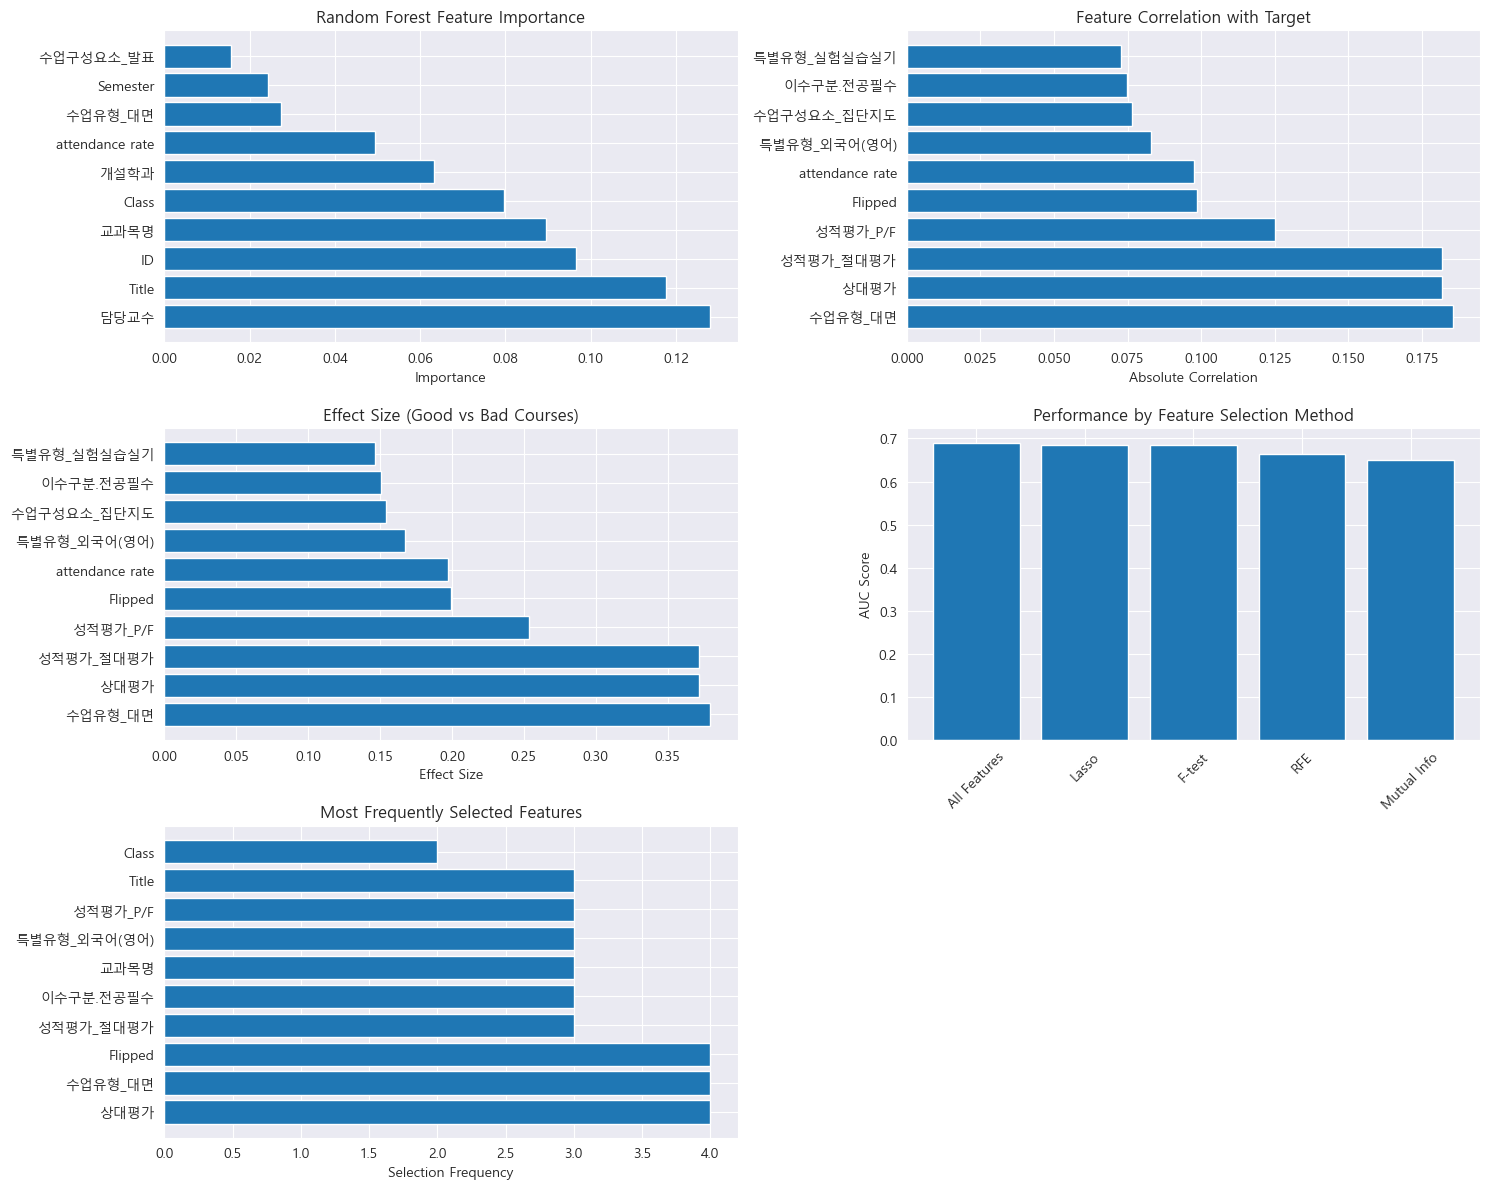


=== 결론 및 권장사항 ===
1. 최고 성능 달성 방법: All Features (AUC: 0.690)
2. 가장 중요한 피처들:
   - Random Forest 기준: ['담당교수', 'Title', 'ID', '교과목명', 'Class']
   - 상관관계 기준: ['수업유형_대면', '상대평가', '성적평가_절대평가', '성적평가_P/F', 'Flipped']
   - 효과 크기 기준: ['수업유형_대면', '상대평가', '성적평가_절대평가', '성적평가_P/F', 'Flipped']
3. 여러 방법에서 공통으로 선택되는 핵심 피처들:
   ['상대평가', '수업유형_대면', 'Flipped', '성적평가_절대평가', '이수구분.전공필수']


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import (
    SelectKBest, f_classif, mutual_info_classif, RFE,
    SelectFromModel, chi2
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# 타겟 변수 생성 (4.0 이상이면 1(좋은 강의), 미만이면 0(나쁜 강의))
df['good_course'] = (df['course evaluation'] >= 4.0).astype(int)

print(f"좋은 강의 (4.0 이상): {df['good_course'].sum()}개")
print(f"나쁜 강의 (4.0 미만): {(df['good_course'] == 0).sum()}개")
print(f"좋은 강의 비율: {df['good_course'].mean():.3f}")

# 피처 전처리 함수
def prepare_features(df, exclude_additional_cols=None):
    # 기본적으로 제외할 컬럼들
    exclude_cols = ['course evaluation', 'good_course']

    # 추가로 제외할 컬럼들이 있다면 추가
    if exclude_additional_cols:
        exclude_cols.extend(exclude_additional_cols)

    feature_cols = [col for col in df.columns if col not in exclude_cols]
    print(f"제외된 컬럼들: {exclude_cols}")
    print(f"사용할 컬럼들: {feature_cols}")

    X = df[feature_cols].copy()
    numeric_features = []
    categorical_features = []

    for col in X.columns:
        if X[col].dtype in ['int64', 'float64', 'bool']:
            numeric_features.append(col)
        else:
            categorical_features.append(col)

    # 범주형 변수 인코딩
    le_dict = {}
    for col in categorical_features:
        if X[col].notna().sum() > 0:
            le = LabelEncoder()
            X[col] = X[col].fillna('Unknown')
            X[col] = le.fit_transform(X[col])
            le_dict[col] = le

    # 결측값 처리
    X = X.fillna(X.mean())

    return X, numeric_features, categorical_features, le_dict, feature_cols

# 제외하고 싶은 컬럼들을 여기에 리스트로 입력하세요
# 예시: exclude_columns = ['컬럼명1', '컬럼명2', '컬럼명3']
exclude_columns = ["course evaluation", "course difficulty", "teaching ability", "achievement level", "Year", "learning load", "recommendation rate"]  # 여기에 제외할 컬럼명들을 입력

# 피처 준비
X, numeric_features, categorical_features, le_dict, feature_cols = prepare_features(df, exclude_columns)
y = df['good_course']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n=== 데이터 정보 ===")
print(f"전체 샘플 수: {len(X)}")
print(f"피처 수: {X.shape[1]}")
print(f"피처 목록: {feature_cols}")

# 1. 단변량 통계 분석 (각 피처별로 좋은/나쁜 강의 간 차이 분석)
print("\n=== 1. 단변량 통계 분석 ===")
univariate_scores = []

for i, col in enumerate(feature_cols):
    good_courses = X[y == 1][col]
    bad_courses = X[y == 0][col]

    # t-test 수행
    if len(good_courses) > 1 and len(bad_courses) > 1:
        t_stat, p_value = ttest_ind(good_courses, bad_courses)
        effect_size = abs(good_courses.mean() - bad_courses.mean()) / np.sqrt(
            ((len(good_courses)-1)*good_courses.var() + (len(bad_courses)-1)*bad_courses.var()) /
            (len(good_courses) + len(bad_courses) - 2)
        )
    else:
        t_stat, p_value, effect_size = 0, 1, 0

    univariate_scores.append({
        'feature': col,
        't_stat': abs(t_stat),
        'p_value': p_value,
        'effect_size': effect_size,
        'good_mean': good_courses.mean(),
        'bad_mean': bad_courses.mean()
    })

univariate_df = pd.DataFrame(univariate_scores).sort_values('effect_size', ascending=False)
print("상위 10개 피처 (효과 크기 기준):")
print(univariate_df.head(10)[['feature', 'effect_size', 'p_value', 'good_mean', 'bad_mean']])

# 2. 상관관계 기반 피처 선택
print("\n=== 2. 상관관계 기반 피처 선택 ===")
correlations = []
for col in feature_cols:
    corr = np.corrcoef(X[col], y)[0, 1]
    correlations.append({'feature': col, 'correlation': abs(corr)})

corr_df = pd.DataFrame(correlations).sort_values('correlation', ascending=False)
print("상위 10개 피처 (상관관계 기준):")
print(corr_df.head(10))

# 3. 머신러닝 기반 피처 중요도
print("\n=== 3. 머신러닝 기반 피처 중요도 ===")

# Random Forest 피처 중요도
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Random Forest 피처 중요도 (상위 10개):")
print(rf_importance.head(10))

# 4. 여러 피처 선택 방법들
print("\n=== 4. 여러 피처 선택 방법 비교 ===")

feature_selection_methods = {}

# SelectKBest (f_classif)
selector_f = SelectKBest(score_func=f_classif, k=10)
X_train_f = selector_f.fit_transform(X_train_scaled, y_train)
selected_features_f = [feature_cols[i] for i in selector_f.get_support(indices=True)]
feature_selection_methods['F-test'] = selected_features_f

# SelectKBest (mutual_info)
selector_mi = SelectKBest(score_func=mutual_info_classif, k=10)
X_train_mi = selector_mi.fit_transform(X_train_scaled, y_train)
selected_features_mi = [feature_cols[i] for i in selector_mi.get_support(indices=True)]
feature_selection_methods['Mutual Info'] = selected_features_mi

# Recursive Feature Elimination with Logistic Regression
rfe = RFE(LogisticRegression(random_state=42), n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)
selected_features_rfe = [feature_cols[i] for i in rfe.get_support(indices=True)]
feature_selection_methods['RFE'] = selected_features_rfe

# Lasso 기반 피처 선택
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)
selected_features_lasso = [feature_cols[i] for i, coef in enumerate(lasso.coef_) if abs(coef) > 0.01]
feature_selection_methods['Lasso'] = selected_features_lasso

print("각 방법별 선택된 피처:")
for method, features in feature_selection_methods.items():
    print(f"{method}: {features}")

# 5. 피처 조합별 성능 비교
print("\n=== 5. 피처 조합별 성능 평가 ===")

def evaluate_features(selected_features, X_train, X_test, y_train, y_test, method_name):
    if len(selected_features) == 0:
        return method_name, 0, 0

    # 선택된 피처의 인덱스 찾기
    feature_indices = [i for i, col in enumerate(feature_cols) if col in selected_features]

    X_train_selected = X_train_scaled[:, feature_indices]
    X_test_selected = X_test_scaled[:, feature_indices]

    # 로지스틱 회귀로 평가
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train_selected, y_train)

    y_pred = lr.predict(X_test_selected)
    y_pred_proba = lr.predict_proba(X_test_selected)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    return method_name, accuracy, auc

results = []
for method, features in feature_selection_methods.items():
    method_name, acc, auc = evaluate_features(features, X_train_scaled, X_test_scaled, y_train, y_test, method)
    results.append({'Method': method_name, 'Accuracy': acc, 'AUC': auc, 'Features': len(features)})

# 전체 피처 사용한 경우와 비교
lr_all = LogisticRegression(random_state=42)
lr_all.fit(X_train_scaled, y_train)
y_pred_all = lr_all.predict(X_test_scaled)
y_pred_proba_all = lr_all.predict_proba(X_test_scaled)[:, 1]
results.append({
    'Method': 'All Features',
    'Accuracy': accuracy_score(y_test, y_pred_all),
    'AUC': roc_auc_score(y_test, y_pred_proba_all),
    'Features': len(feature_cols)
})

results_df = pd.DataFrame(results).sort_values('AUC', ascending=False)
print("성능 비교 결과:")
print(results_df)

# 6. 최적 피처 조합 찾기
print("\n=== 6. 최적 피처 조합 분석 ===")

# 가장 성능이 좋은 방법의 피처들
best_method = results_df.iloc[0]['Method']
if best_method != 'All Features':
    best_features = feature_selection_methods[best_method]
    print(f"최고 성능 방법: {best_method}")
    print(f"선택된 피처: {best_features}")

    # 선택된 피처들의 통계 정보
    print(f"\n선택된 피처들의 특성:")
    for feature in best_features:
        good_vals = X[y == 1][feature]
        bad_vals = X[y == 0][feature]
        print(f"- {feature}: 좋은강의 평균={good_vals.mean():.3f}, 나쁜강의 평균={bad_vals.mean():.3f}")

# 7. 시각화
plt.figure(figsize=(15, 12))

# 피처 중요도 시각화
plt.subplot(3, 2, 1)
top_features = rf_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')

# 상관관계 시각화
plt.subplot(3, 2, 2)
top_corr = corr_df.head(10)
plt.barh(range(len(top_corr)), top_corr['correlation'])
plt.yticks(range(len(top_corr)), top_corr['feature'])
plt.xlabel('Absolute Correlation')
plt.title('Feature Correlation with Target')

# 효과 크기 시각화
plt.subplot(3, 2, 3)
top_effect = univariate_df.head(10)
plt.barh(range(len(top_effect)), top_effect['effect_size'])
plt.yticks(range(len(top_effect)), top_effect['feature'])
plt.xlabel('Effect Size')
plt.title('Effect Size (Good vs Bad Courses)')

# 성능 비교
plt.subplot(3, 2, 4)
plt.bar(results_df['Method'], results_df['AUC'])
plt.xticks(rotation=45)
plt.ylabel('AUC Score')
plt.title('Performance by Feature Selection Method')

# 피처 선택 방법별 공통 피처 분석
plt.subplot(3, 2, 5)
all_selected_features = []
for features in feature_selection_methods.values():
    all_selected_features.extend(features)

feature_counts = pd.Series(all_selected_features).value_counts().head(10)
plt.barh(range(len(feature_counts)), feature_counts.values)
plt.yticks(range(len(feature_counts)), feature_counts.index)
plt.xlabel('Selection Frequency')
plt.title('Most Frequently Selected Features')

plt.tight_layout()
plt.show()

print("\n=== 결론 및 권장사항 ===")
print(f"1. 최고 성능 달성 방법: {best_method} (AUC: {results_df.iloc[0]['AUC']:.3f})")
print("2. 가장 중요한 피처들:")
print("   - Random Forest 기준:", list(rf_importance.head(5)['feature']))
print("   - 상관관계 기준:", list(corr_df.head(5)['feature']))
print("   - 효과 크기 기준:", list(univariate_df.head(5)['feature']))
print("3. 여러 방법에서 공통으로 선택되는 핵심 피처들:")
print("  ", list(feature_counts.head(5).index))

In [20]:
from scipy.stats import f_oneway

groups = [group['learning load'].values for _, group in df.groupby('Year')]
f_stat, p_value = f_oneway(*groups)
print(f"F={f_stat:.3f}, p={p_value:.15f}")

F=45.409, p=0.000000000000000


In [12]:
print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value:.50f}")

F-statistic: 528.7670787712281
p-value: 0.00000000000000000000000000000000000000000000000000


In [15]:
groups

[array([4.8, 3.9, 4. , ..., 2.7, 2.7, 4.2]),
 array([5. , 4.8, 2.9, ..., 3.3, 3.6, 3.6]),
 array([4.2, 3.4, 3.4, ..., 3.6, 3. , 2.9]),
 array([4.7, 3.8, 3.2, ..., 4. , 3.5, 3.9]),
 array([4.4, 4.6, 4.2, ..., 3.4, 4.2, 3.9]),
 array([4.4, 4.4, 3.1, ..., 4.5, 3.6, 4. ]),
 array([3.8, 4.3, 4.3, ..., 4.7, 3.8, 3.7])]

C:\Users\hyese\AppData\Local\Temp\ipykernel_15244\1937120227.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Year', y='course evaluation', ci='sd')


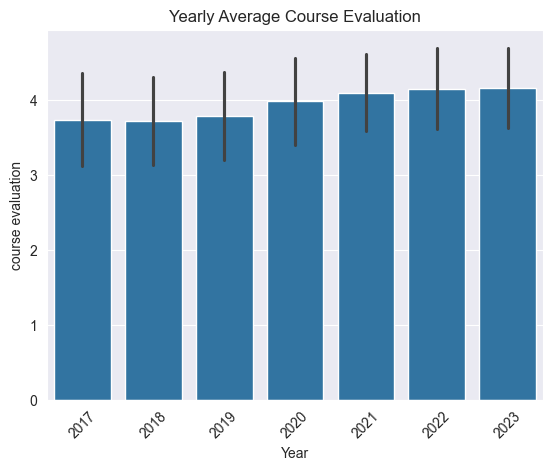

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='Year', y='course evaluation', ci='sd')
plt.title('Yearly Average Course Evaluation')
plt.xticks(rotation=45)
plt.show()

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['attendance rate'], groups=df['Year'], alpha=0.05)
print(tukey)

ModuleNotFoundError: No module named 'statsmodels'

In [21]:
df.groupby('Year')['course evaluation'].std()

Year
2017    0.620245
2018    0.585128
2019    0.587570
2020    0.575842
2021    0.513798
2022    0.537432
2023    0.536362
Name: course evaluation, dtype: float64

ModuleNotFoundError: No module named 'pingouin'